## Introduzione
Caricamento dataset e modifiche iniziali

In [1]:
# from google.colab import drive

# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv("drive/MyDrive/smoking.csv", sep=",")
df = pd.read_csv('smoking.csv')
df = df[:10000]

In [3]:
df.head()

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y              0   
1            1.0               0.6  22.0  19.0  18.0     Y              0   
2            1.0               1.0  21.0  16.0  22.0     Y              0   
3            1.0               1.0  19.0  26.0  18.0     Y              0   
4            1.0               0.6  16.0  14.0  22.0     Y              0   

   tartar  smoking  
0       Y        0  
1       Y        0  
2       N        1  
3       Y        0  
4       N        0  

[5 rows x 27 columns]

Si è deciso di ridurre la dimensione del dataset da oltre 50.000 a 10.000 valori al fine di ottimizzare i tempi di addestramento dei modelli, garantendo così una maggiore efficienza nel processo di analisi e sviluppo. È importante sottolineare che nonostante questa riduzione, il rapporto tra i valori delle due classi della colonna target rimane invariato, mantenendo l'integrità e la rappresentatività dei dati.

In [4]:
original_counts = df['smoking'].value_counts()
print("Counts nel dataset originale:\n", original_counts)
print("Rapporto:\n", original_counts[0]/original_counts[1])

df = df[:10000]

sampled_counts = df['smoking'].value_counts()
print("\nCounts nel dataset partizionato:\n", sampled_counts)
print("Rapporto:\n", sampled_counts[0]/sampled_counts[1])

Counts nel dataset originale:
 0    35237
1    20455
Name: smoking, dtype: int64
Rapporto:
 1.7226594964556343

Counts nel dataset partizionato:
 0    6384
1    3616
Name: smoking, dtype: int64
Rapporto:
 1.7654867256637168


Innanzitutto eliminiamo la colonna "ID" in quanto non è indicativa per il nostro target: "smoking"

In [4]:
df = df.drop(['ID'], axis=1)

In [5]:
df.dtypes

gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

Per semplificare il processo di analisi e trattamento dei dati, abbiamo convertito le colonne che originariamente contenevano solo valori "M/F" o "Y/N" in un formato binario utilizzando la codifica 0/1. Questa trasformazione consente una maggiore uniformità e facilità di manipolazione dei dati durante le fasi di elaborazione e modellazione. Anziché gestire valori testuali come "M" o "F", ora possiamo utilizzare valori numerici come 1 per "M" e 0 per "F", e 1 per "Y" e 0 per "N".

In [6]:
df['tartar'] = df['tartar'].apply(lambda x: 1 if x == 'Y' else 0)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
df['oral'] = df['oral'].apply(lambda x: 1 if x == 'Y' else 0)

In [7]:
df.dtypes

gender                   int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                     int64
dental caries            int64
tartar                   int64
smoking                  int64
dtype: object

## Analisi covariate

In [ ]:
import numpy as np
# Crea un istogramma e un boxplot per ogni colonna del dataset
for col in df.columns:
    # Istogramma
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Istogramma di {col}')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    plt.show()

    x_values = np.random.uniform(0.5, 1.5, size=len(df[col]))

    plt.figure(figsize=(8, 6), facecolor='white')

    # Boxplot (sovrapposto a scatter plot)
    plt.boxplot(df[col], widths=1.5, patch_artist=True,  boxprops=dict(edgecolor=(1.0, 0.0, 1.0), facecolor='none', linewidth=2.5), medianprops=dict(color='red', linewidth=2.5))

    # Scatter plot
    plt.scatter(x_values, df[col], s=10, color='black', alpha=0.5)

    plt.title(f'Boxplot e scatter plot di {col}')
    plt.ylabel(col)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Dai grafici e anche dalla colonna che segue possiamo vedere che la colonna "oral" contiene solo una classe, perciò proseguiamo eliminandola poichè non è indicativa per il nostro target

In [8]:
print(df['oral'].unique())

[1]


In [9]:
df = df.drop(['oral'], axis=1)

In [ ]:
attributi_discreti = ['gender', 'hearing(left)', 'hearing(right)', 'dental caries', 'tartar']

attributi_continui = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp']

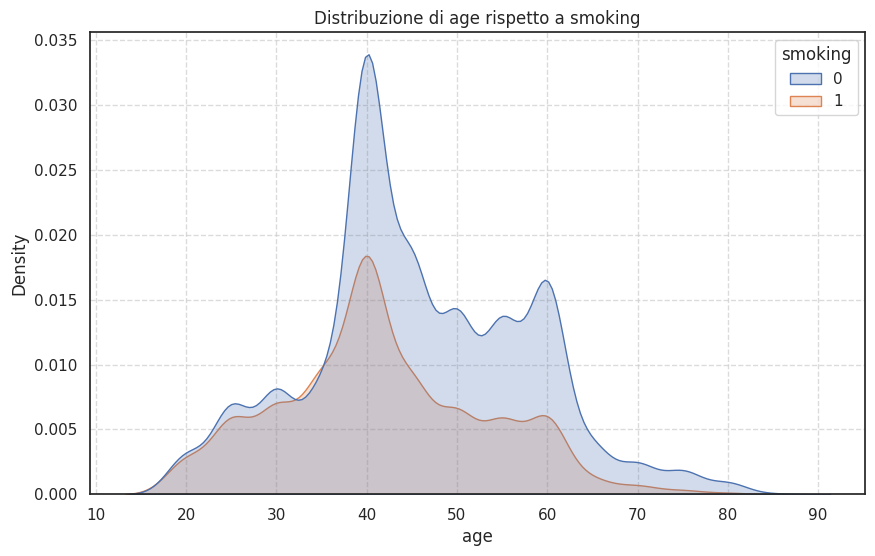

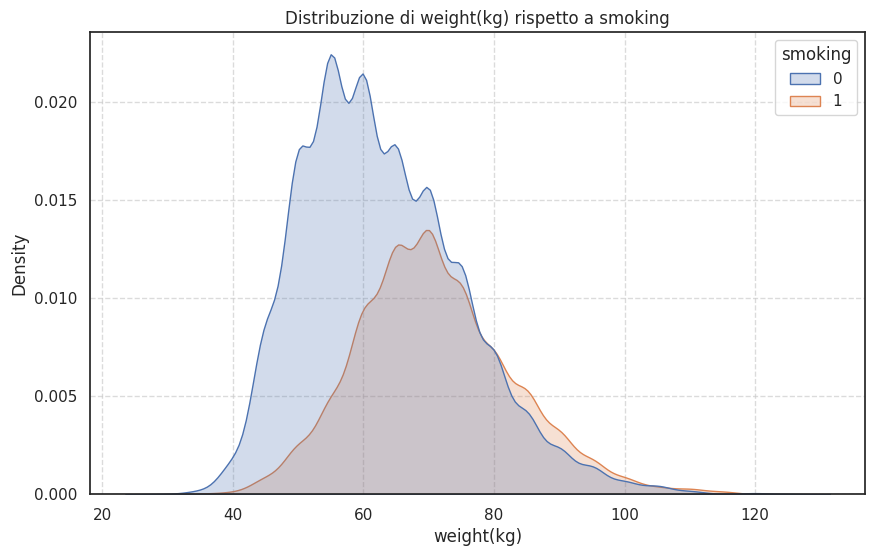

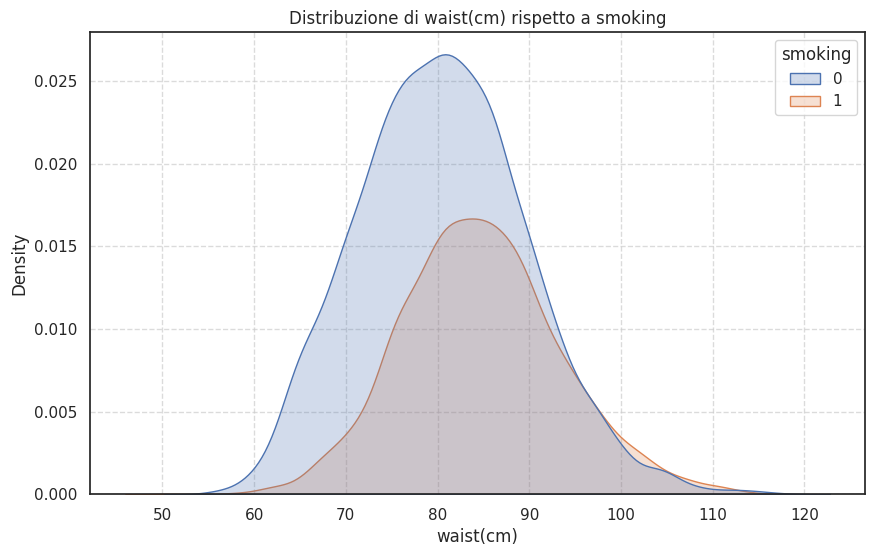

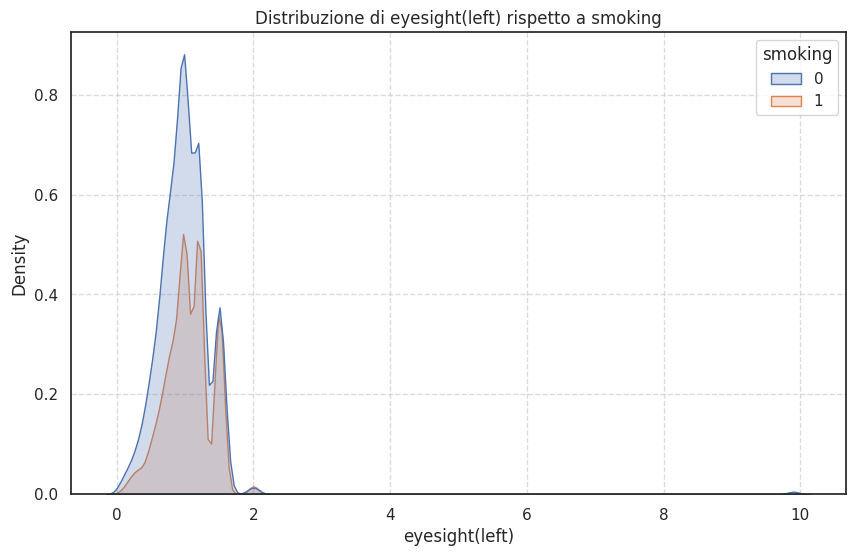

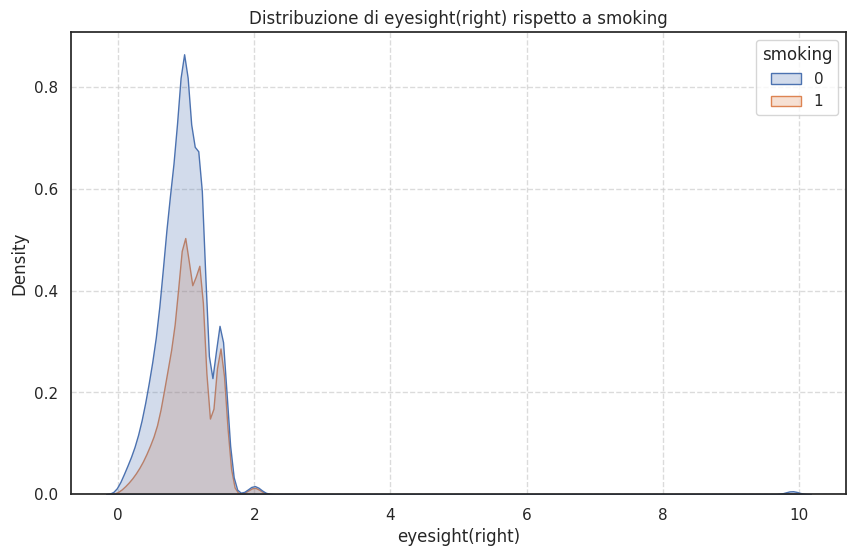

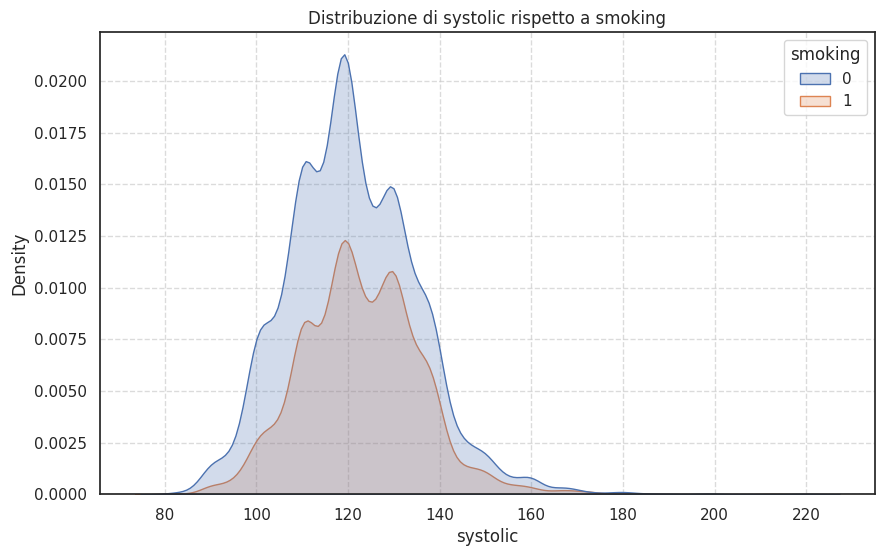

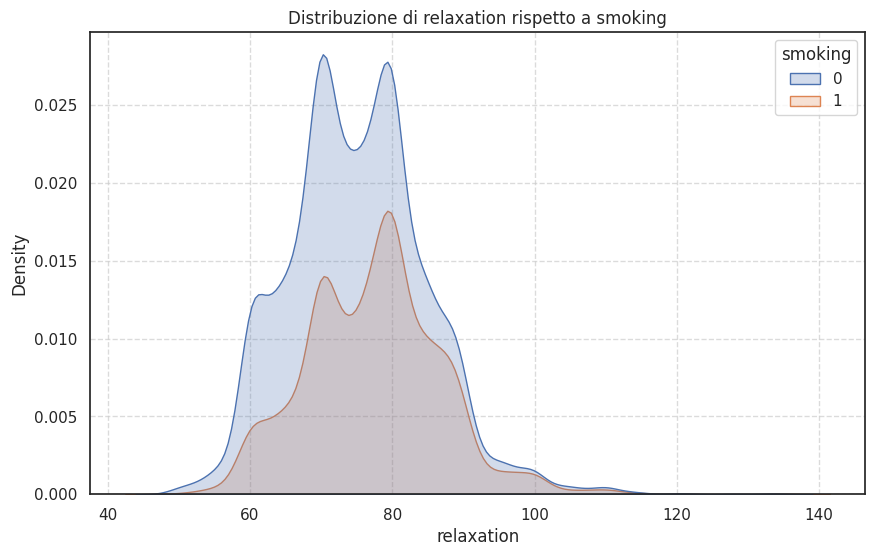

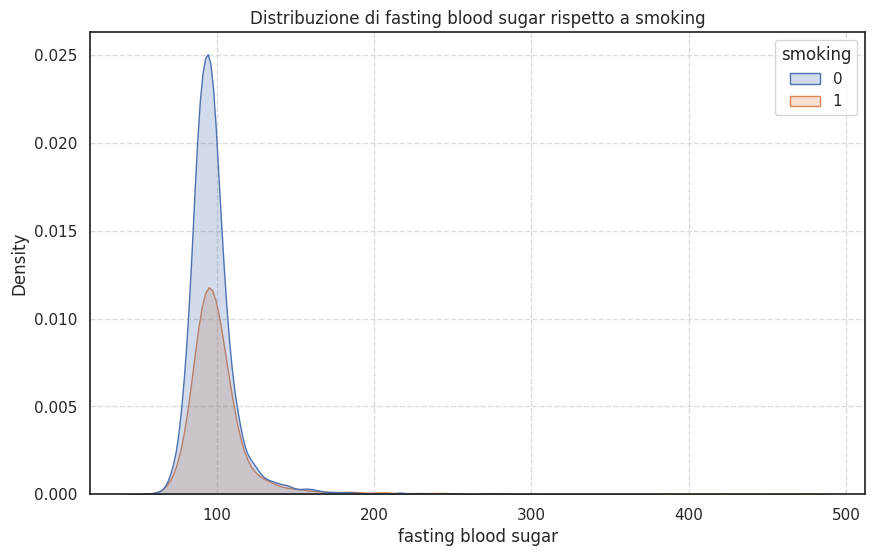

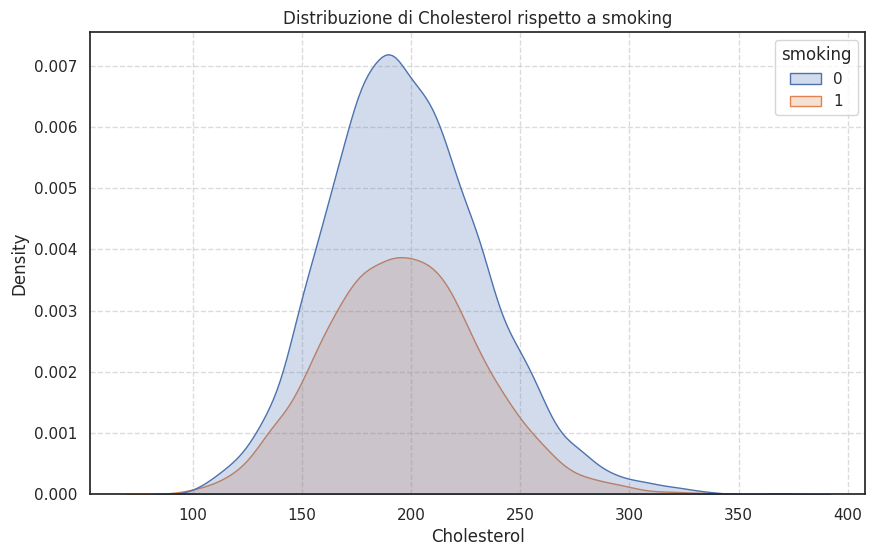

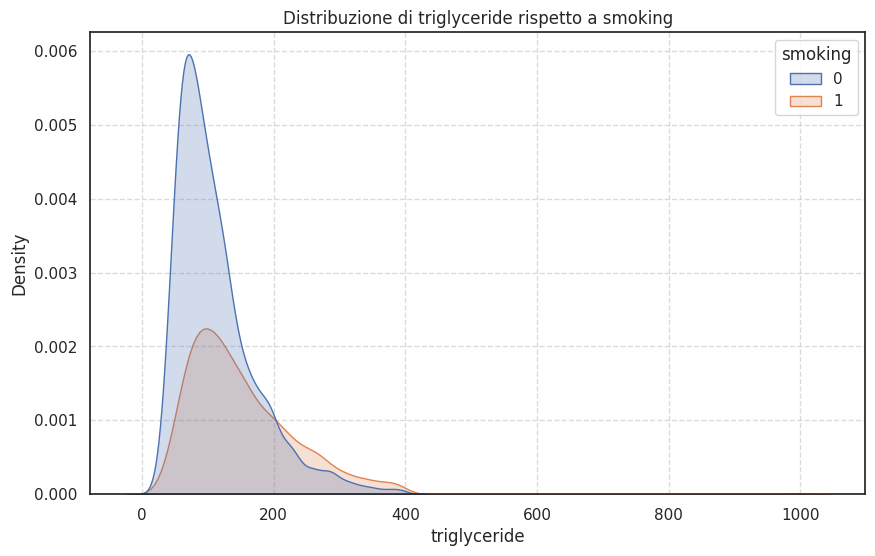

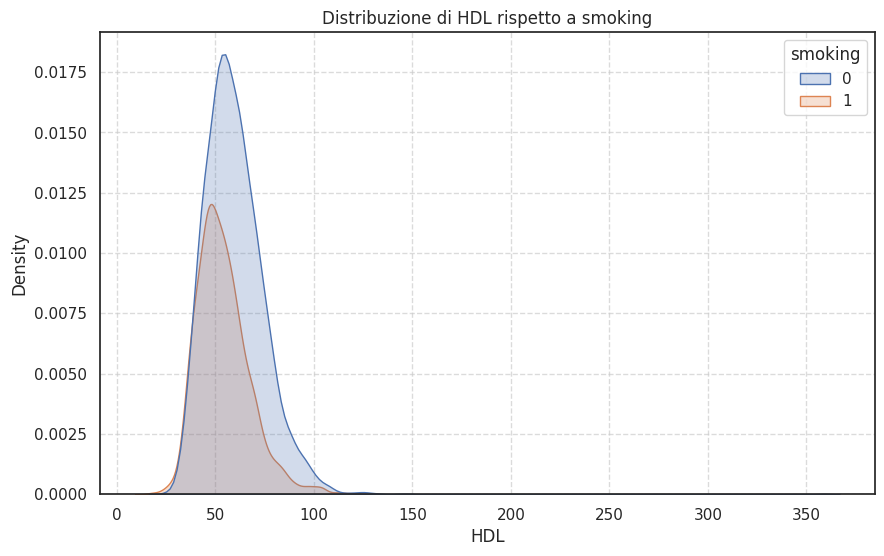

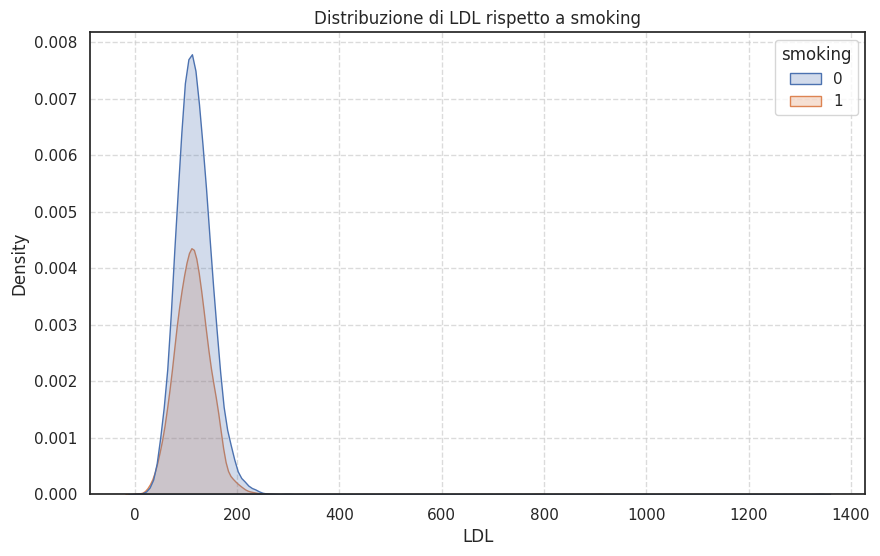

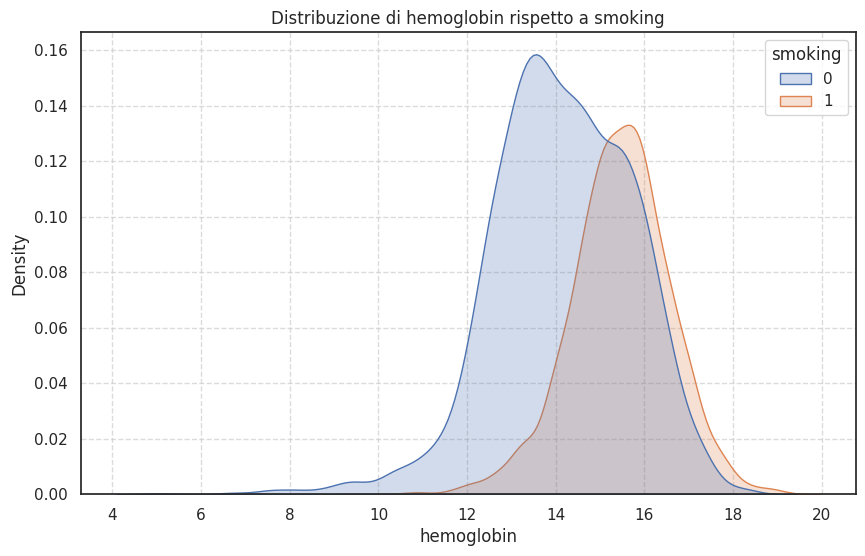

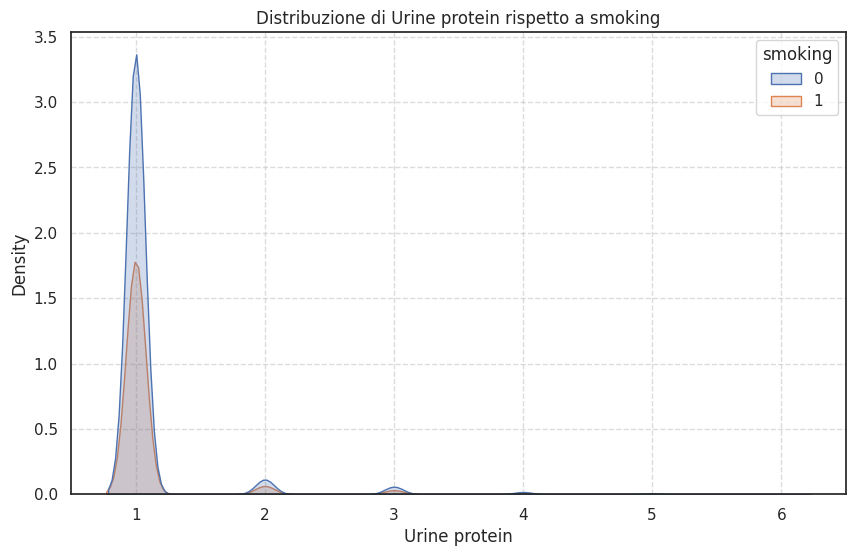

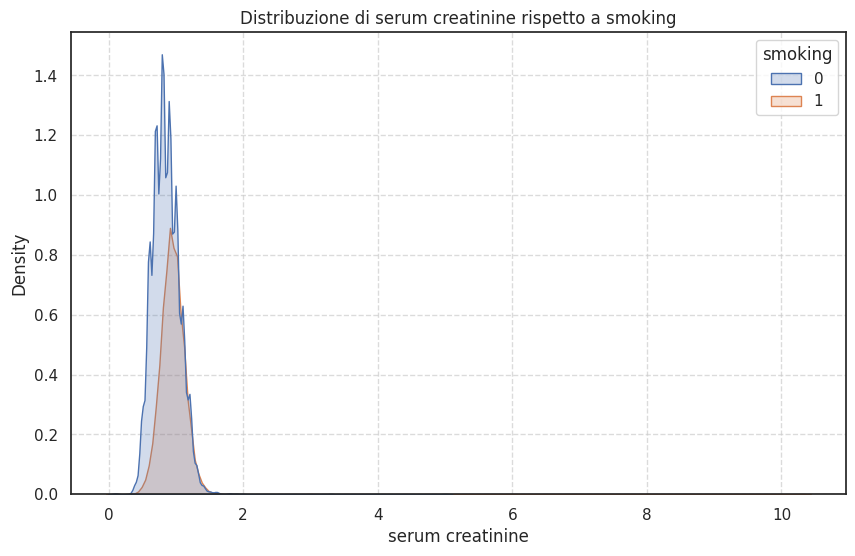

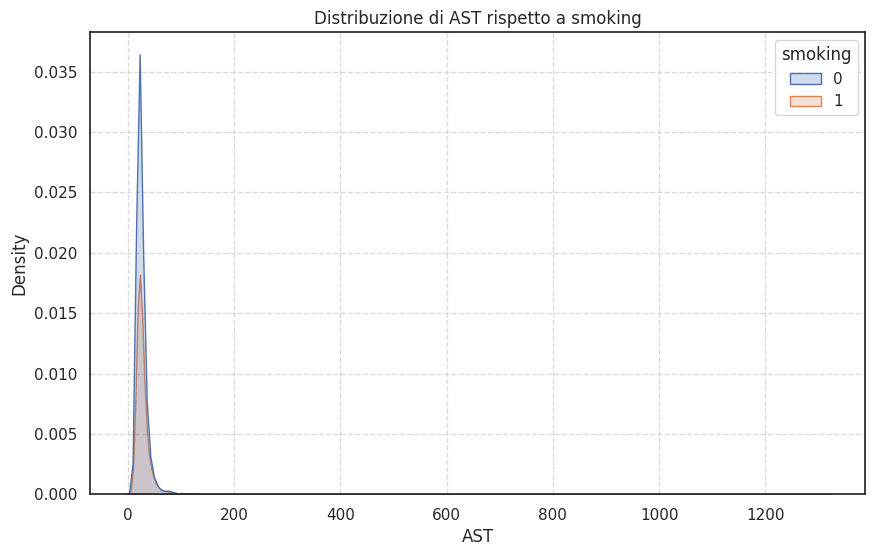

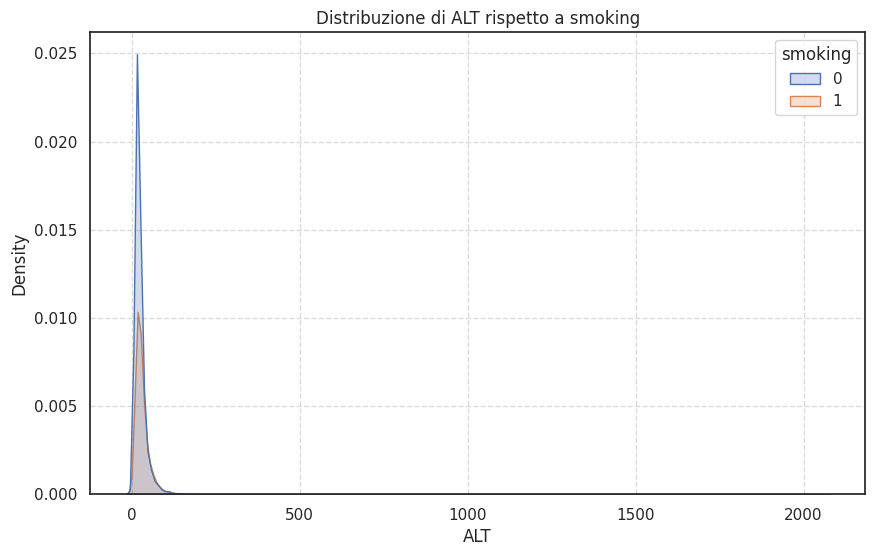

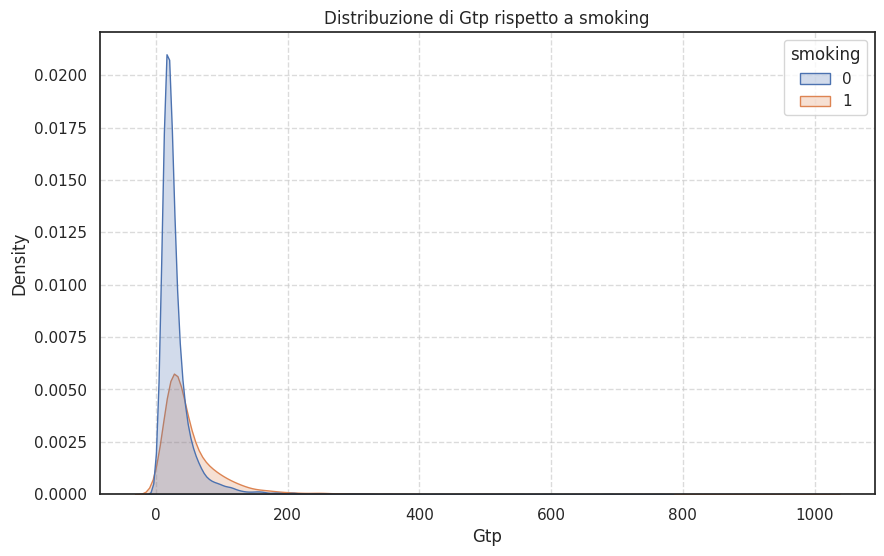

In [ ]:
import seaborn as sns

#Creiamo i grafici bivariati per gli attributi continui
for attributo in attributi_continui:
    plt.figure(figsize=(10, 6))

    ax = plt.gca()
    ax.set_facecolor('white')
    ax.grid(True, linestyle='--', alpha=0.7)

    sns.kdeplot(data=df, x=attributo, hue='smoking', fill=True)
    plt.title(f'Distribuzione di {attributo} rispetto a smoking')
    plt.show()

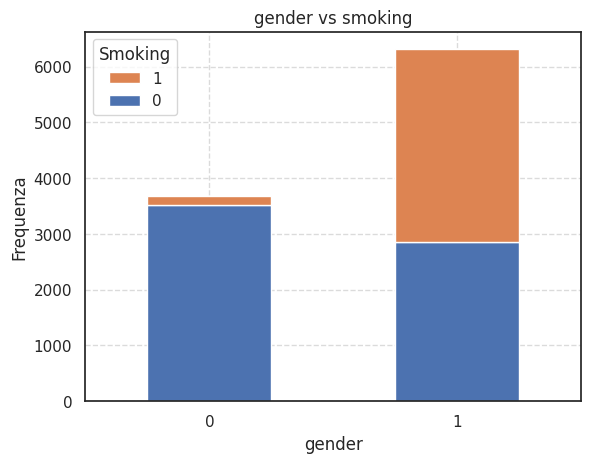

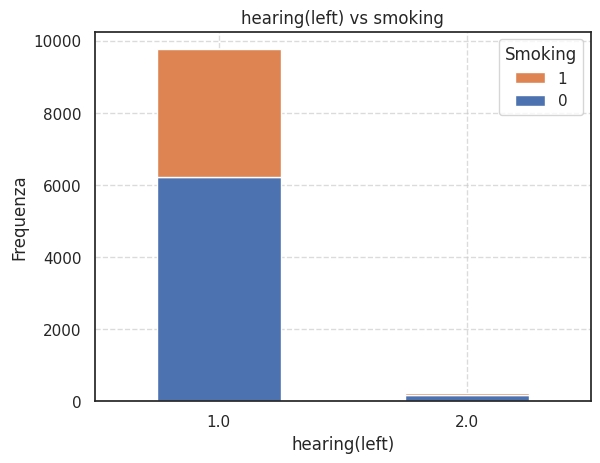

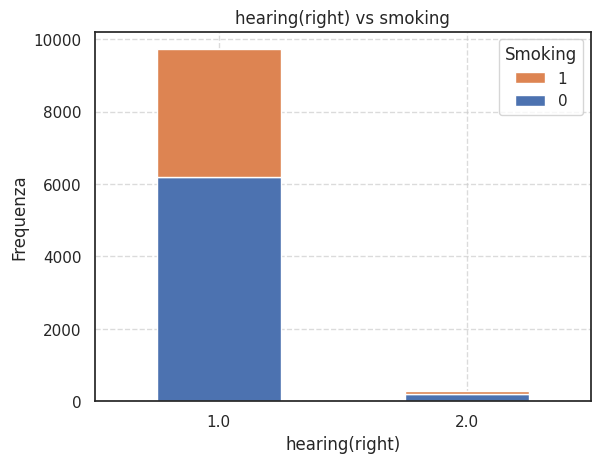

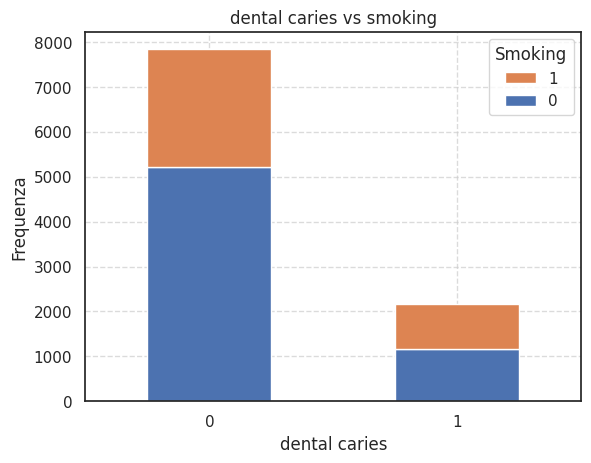

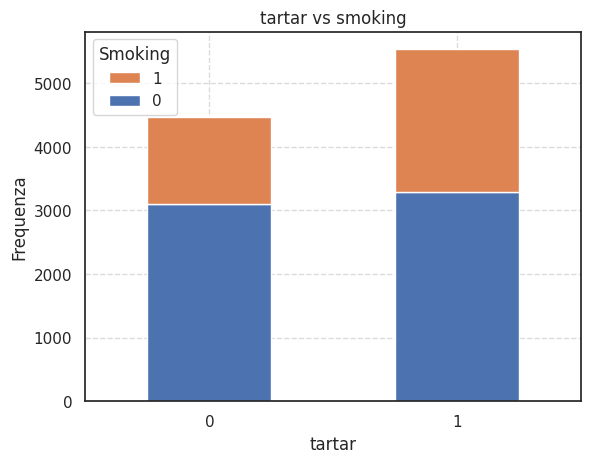

In [ ]:
#Creiamo i grafici bivariati per gli attributi discreti (in questo caso sotto forma di istogrammi per favorire la leggibilità)
for attributo in attributi_discreti:
    grouped = df.groupby([attributo, 'smoking']).size().unstack()

    ax = grouped.plot(kind='bar', stacked=True)

    ax.set_facecolor('white')
    ax.grid(True, linestyle='--', alpha=0.7)

    ax.set_title(f'{attributo} vs smoking')
    ax.set_xlabel(f'{attributo}')
    ax.set_ylabel('Frequenza')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Smoking')

    plt.show()

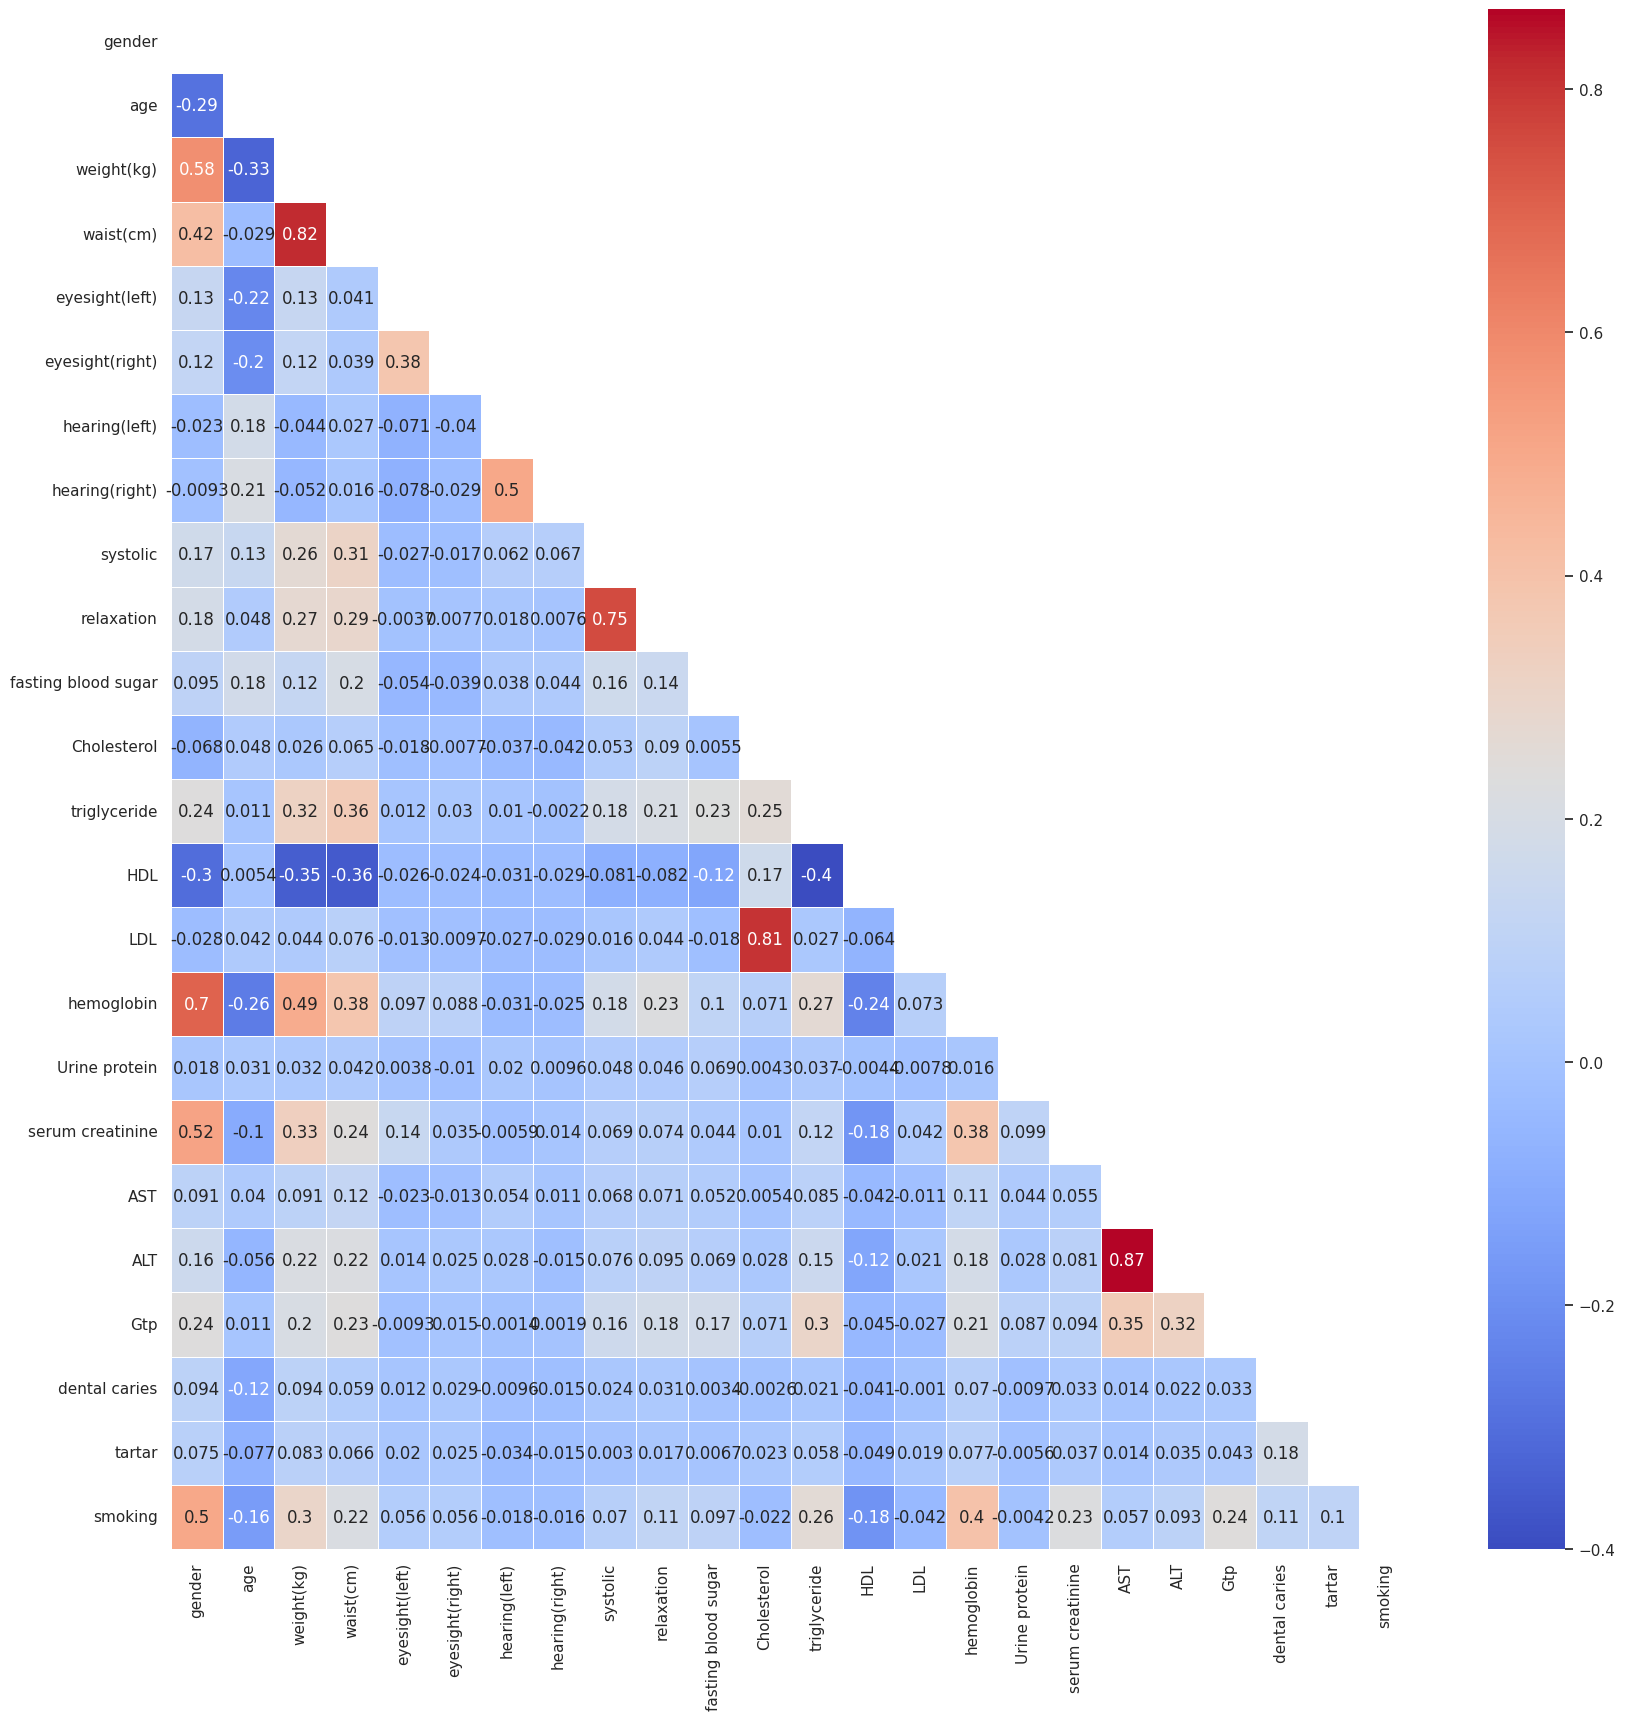

In [ ]:
# Calcoliamo la matrice di correlazione
import numpy as np

correlation_matrix = df.corr()
sns.set(style="white")
plt.figure(figsize=(20, 20))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)

plt.show()

Notiamo:

- forte correlazione positiva tra gender, weight, waist, triglyceride, hemoglobin, serum creatinine, gtp e la variabile target

- forte correlazione negativa tra hdl e variabile target

## PCA

Dato l'elevato numero di attributi nel dataset, intendiamo ridurre la sua dimensionalità identificando le componenti principali che catturano la maggior parte della variazione dei dati.

In [7]:
#Escludiamo la colonna target dalle colonne sottoposte alla PCA
variabili_pca = list(df.columns[:-1])
print(variabili_pca)

['gender', 'age', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar']


In [8]:
#Standardizziamo le colonne su cui andiamo a lavorare
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variabili_pca])
scaled_data

array([[-1.30824185, -0.3498111 , -0.4533991 , ..., -0.25219847,
        -0.5252006 ,  0.89833802],
       [-1.30824185, -0.3498111 , -0.4533991 , ..., -0.42709473,
        -0.5252006 ,  0.89833802],
       [ 0.76438466,  0.89300428, -0.4533991 , ..., -0.34936306,
        -0.5252006 , -1.11316673],
       ...,
       [ 0.76438466,  1.30727608, -0.06260518, ..., -0.21333263,
        -0.5252006 ,  0.89833802],
       [ 0.76438466, -0.7640829 , -0.4533991 , ..., -0.40766182,
        -0.5252006 ,  0.89833802],
       [ 0.76438466, -0.7640829 ,  1.89136437, ..., -0.23276555,
        -0.5252006 ,  0.89833802]])

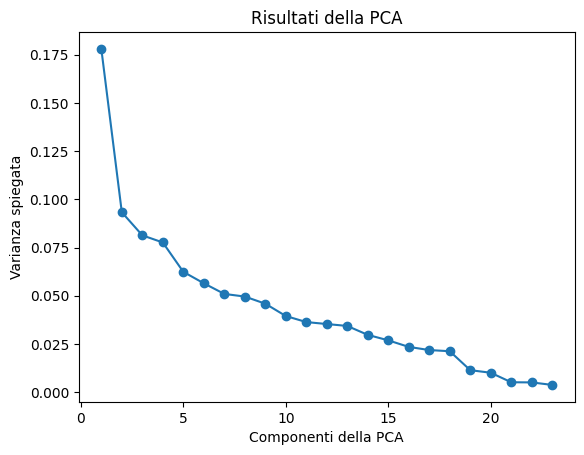

In [9]:
pca = PCA().fit(scaled_data)

# Creiamo un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [10]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=12).fit(scaled_data)
pca_data = pca.transform(scaled_data)
# Quantifichiamo la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.1779699  0.09329927 0.08133556 0.07763173 0.06241215 0.05647984
 0.05095945 0.04959773 0.04589814 0.03951102 0.03636944 0.03535539]


Scegliendo 12 componenti principali otteniamo una varianza che copre l'80% della varianza totale

In [11]:
sum = 0
for data in pca.explained_variance_ratio_:
    sum += data
print(sum)

0.8068196025499773


In [12]:
#Esaminiamo l'incidenza di ciascun attributo sulle componenti principali generate
pca_df = pd.DataFrame(abs(pca.components_[:12]), columns=df.columns[:-1],
                     index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PCA11','PCA12'])
pca_df

gender       age  weight(kg)  waist(cm)  eyesight(left)  \
PC1    0.366260  0.110620    0.400539   0.371181        0.073116   
PC2    0.217294  0.437956    0.136448   0.040644        0.300940   
PC3    0.051789  0.001124    0.034645   0.043762        0.014510   
PC4    0.078511  0.151881    0.077590   0.113247        0.077919   
PC5    0.133535  0.054383    0.017949   0.031294        0.021170   
PC6    0.016080  0.090532    0.049488   0.105975        0.450027   
PC7    0.025565  0.130499    0.009354   0.033662        0.231096   
PC8    0.251115  0.078071    0.000110   0.095062        0.281855   
PC9    0.051241  0.081630    0.160917   0.167661        0.093545   
PC10   0.206430  0.040155    0.223533   0.263637        0.002726   
PCA11  0.040740  0.373566    0.224096   0.172482        0.203475   
PCA12  0.008335  0.195742    0.027470   0.013511        0.123208   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
PC1           0.067477       0.006519        0.011586  0.217621    0.230033   
PC2           0.254098       0.260309        0.249443  0.277437    0.238034   
PC3           0.007618       0.146769        0.132298  0.086575    0.116050   
PC4           0.076751       0.213192        0.249231  0.262622    0.214570   
PC5           0.017359       0.464194        0.472970  0.408642    0.437299   
PC6           0.486464       0.317167        0.309161  0.271204    0.273910   
PC7           0.187851       0.097976        0.103217  0.092657    0.099674   
PC8           0.397814       0.014553        0.010891  0.098879    0.100857   
PC9           0.039733       0.044088        0.011806  0.066094    0.062987   
PC10          0.044130       0.025477        0.049448  0.053437    0.035274   
PCA11         0.002088       0.150783        0.082386  0.115253    0.093581   
PCA12         0.033785       0.070406        0.086824  0.014515    0.025707   

       ...       HDL       LDL  hemoglobin  Urine protein  serum creatinine  \
PC1    ...  0.230236  0.043820    0.347067       0.042375          0.237657   
PC2    ...  0.025295  0.131649    0.152138       0.066037          0.162115   
PC3    ...  0.054391  0.583652    0.037951       0.030103          0.002123   
PC4    ...  0.148789  0.248919    0.017230       0.008996          0.053523   
PC5    ...  0.192139  0.220045    0.106798       0.012524          0.224388   
PC6    ...  0.290943  0.049162    0.002229       0.012102          0.001637   
PC7    ...  0.126631  0.011090    0.038716       0.161077          0.065171   
PC8    ...  0.306400  0.053828    0.247722       0.107663          0.360645   
PC9    ...  0.207781  0.051922    0.030805       0.751054          0.250391   
PC10   ...  0.309433  0.105613    0.253224       0.569341          0.098266   
PCA11  ...  0.280042  0.085532    0.008104       0.135728          0.391524   
PCA12  ...  0.078187  0.123580    0.045690       0.099311          0.198779   

            AST       ALT       Gtp  dental caries    tartar  
PC1    0.157827  0.208873  0.217083       0.062957  0.063812  
PC2    0.255468  0.204504  0.187376       0.086112  0.069152  
PC3    0.331610  0.296754  0.128815       0.001036  0.026415  
PC4    0.498954  0.491844  0.200794       0.018141  0.046209  
PC5    0.003197  0.008916  0.089419       0.004307  0.019736  
PC6    0.079675  0.062074  0.020870       0.009847  0.063811  
PC7    0.023207  0.016633  0.039357       0.640157  0.580348  
PC8    0.058841  0.019834  0.069077       0.208386  0.287820  
PC9    0.072647  0.131727  0.245077       0.163931  0.215806  
PC10   0.074504  0.126777  0.373191       0.047131  0.012278  
PCA11  0.119102  0.100879  0.299411       0.272980  0.473014  
PCA12  0.096516  0.091494  0.285187       0.572633  0.461303  

[12 rows x 23 columns]

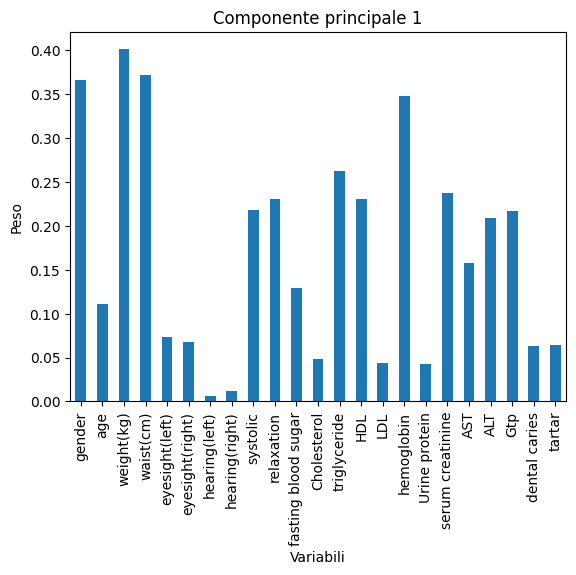

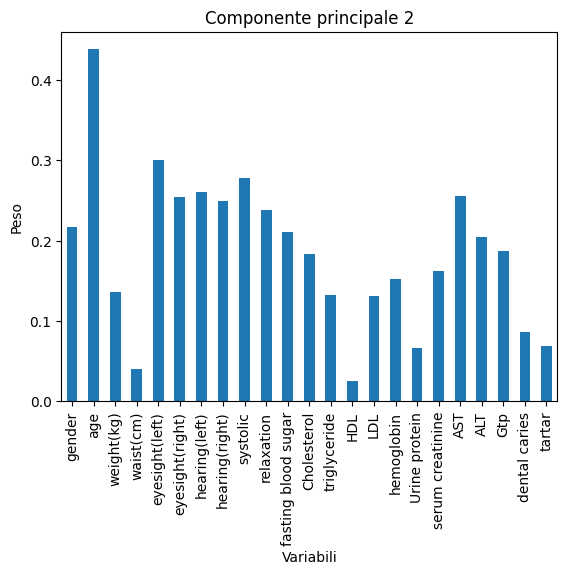

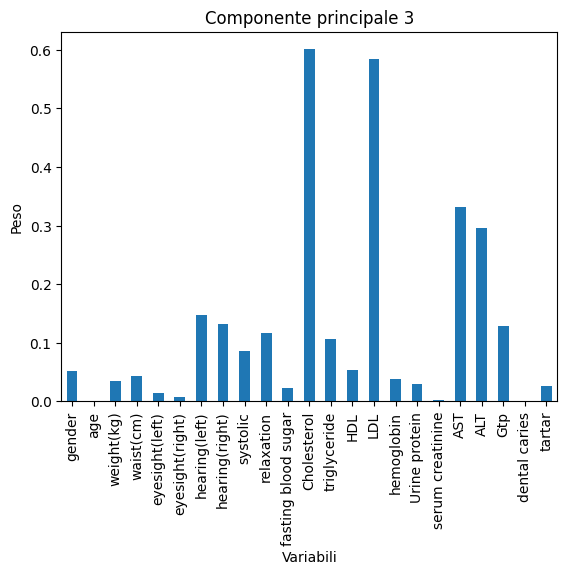

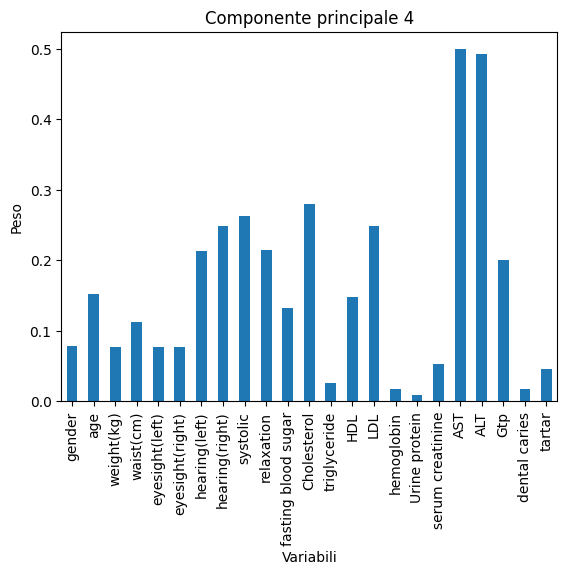

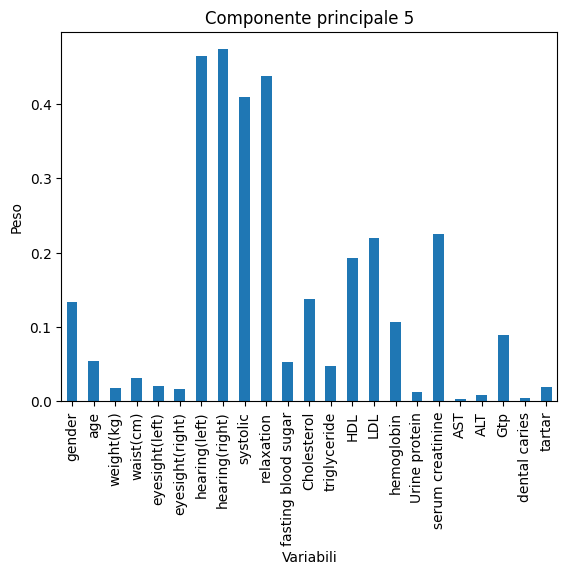

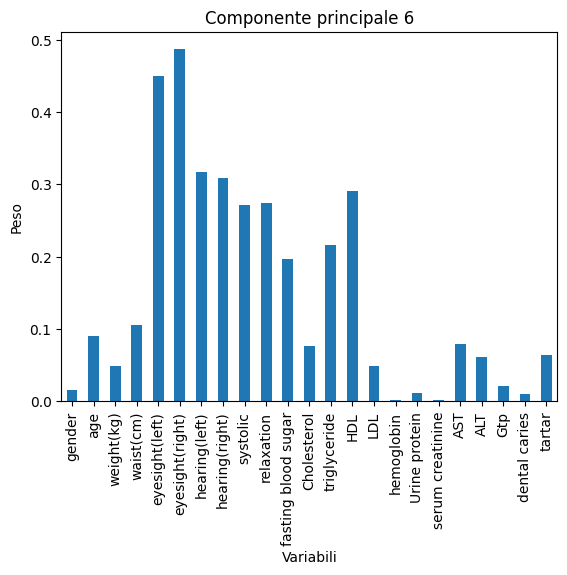

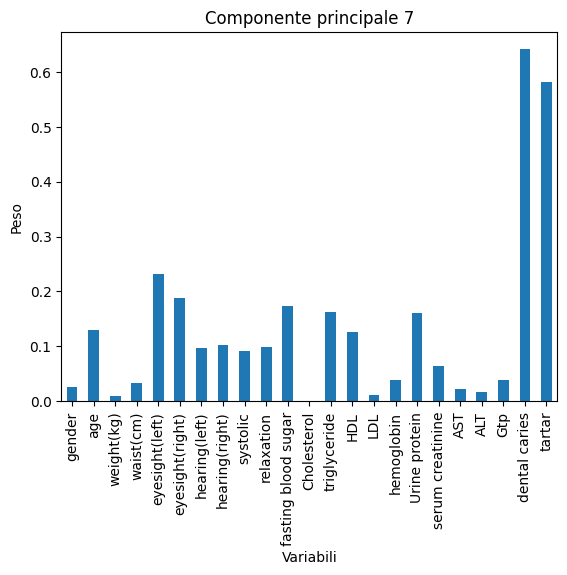

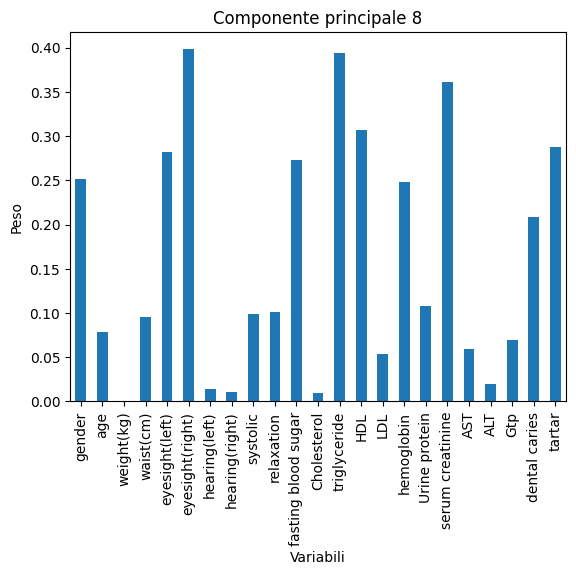

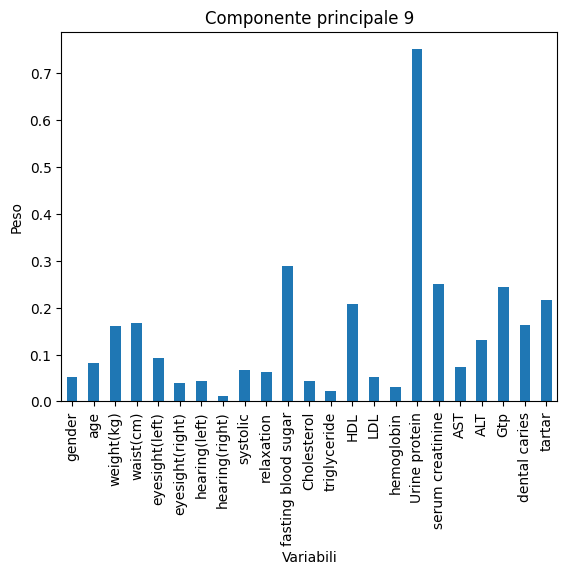

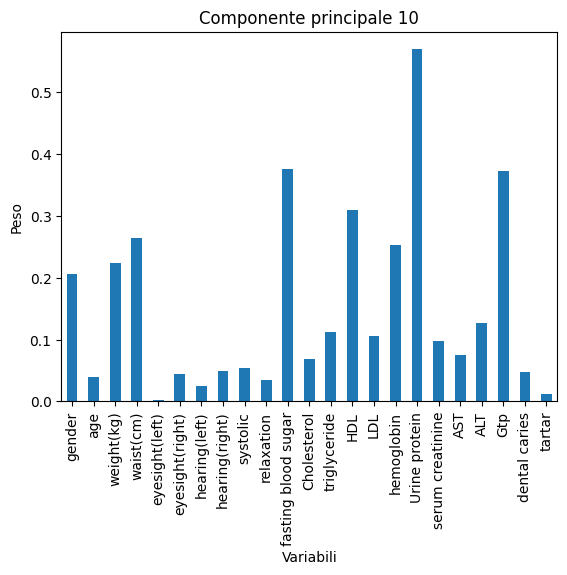

In [13]:
#Vediamo anche graficamente l'incidenza degli attributi
for i in range(10):
    ax = pca_df.iloc[i].plot(kind='bar')
    ax.set_xlabel('Variabili')
    ax.set_ylabel('Peso')
    ax.set_title('Componente principale {}'.format(i+1))
    plt.show()

In [14]:
#Creiamo un nuovo dataframe con le componenti principali
df_pca = pd.DataFrame(data = pca_data,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PCA11','PCA12'])

#Aggiungiamo la colonna target al nuovo dataframe
df_pca['target'] = df['smoking']

In [15]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.940127 -0.146684 -0.697083  0.665727 -0.354449  0.379902 -0.311709   
1    -1.427304  0.719991 -0.155701 -0.125231 -0.184540 -1.472180 -0.069877   
2     0.731397  1.088112 -1.815796 -0.518947 -0.260305  0.110661  0.724632   
3     1.061086 -0.922229 -3.913328  2.186526  2.854848 -0.340259  0.871844   
4    -2.064388 -0.064950  0.062343 -0.155415 -0.772715  0.234646  0.666760   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.847253 -1.749666 -0.582905  0.149497 -0.149248  0.594480 -2.103304   
9996  1.775642 -2.038633  0.599473 -0.106302 -0.193403  0.718517  1.074626   
9997  0.504183 -0.468292  1.507950 -1.235672  0.974221 -2.313054  0.078334   
9998  0.055312 -0.935778 -1.255484  0.065262  0.082702  0.477870 -0.248245   
9999  1.858366  0.162210 -1.288691 -0.319346 -0.015204 -1.073066 -0.743117   

           PC8       PC9      PC10     PCA11     PCA12  target  
0     0.590367 -0.065169  0.194414 -0.024440 -0.796990       0  
1     1.478431 -0.311599  0.386917  0.305107 -0.184195       0  
2    -1.294225 -0.485544 -0.370718  0.533828  0.189851       1  
3     1.550182  0.027634  0.018216  0.556526 -0.541433       0  
4     0.146440 -1.141079  0.999583 -1.024013 -0.198395       0  
...        ...       ...       ...       ...       ...     ...  
9995 -0.405224  0.311686 -0.002684 -0.378170  0.347677       0  
9996  0.101298 -1.363769  0.778192 -1.622088 -0.135256       1  
9997 -0.535428  0.415148 -0.723469  1.637330 -0.314293       1  
9998  0.088848 -0.370521  0.203082  0.949117 -0.834652       0  
9999 -0.845574 -0.355805 -0.167337 -0.599193 -1.205022       0  

[10000 rows x 13 columns]

Abbiamo ottenuto un nuovo dataset con lo stesso numero di righe del precedente ma con sole 13 features al posto che 24

Ora procediamo con l'addestramento dei modelli.

Abbiamo scelto di utilizzare gli alberi decisionali e le SVM.

Valuteremo entrambi i modelli sia con l'applicazione di PCA che senza.

## Modelli

Effettuiamo la divisione sia sul dataset originale che sul dataset ottenuto dopo aver creato le componenti principali mediante la PCA. Le dimensioni dei test set corrisponderanno al 30% dei dataset.

In [10]:
#Suddividiamo il dataset in training set e test set (con test size del 30%)
from sklearn.model_selection import train_test_split

X = df.drop('smoking', axis=1)
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_pca.drop('target', axis=1)
y = df_pca['target']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.3, random_state=42)

### Alberi di decisione

#### Albero di Decisione

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Fai le predizioni sul set di test
y_true = np.ones(len(y_test))
y_pred_tree = np.ones(len(y_test))

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred_tree)

# Stampa la matrice di confusione
print("Matrice di Confusione:")
print(cm)

Matrice di Confusione:
[[   0 1941]
 [   0 1059]]


Facciamo training albero senza PCA

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from time import time

model_tree = DecisionTreeClassifier(random_state=42)
start_time = time()
model_tree.fit(X_train, y_train)
end_time = time()
DecisionTreeNoPCA_training_time = end_time - start_time

# Visualizza l'albero decisionale
fig, ax = plt.subplots(figsize=(150, 100))
plot_tree(model_tree, filled=True, ax=ax)
plt.plot()

[]

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# predizione del nuovo modello
y_pred = model_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)

print("Test Set Performance:")
print(classification_report(y_test, y_pred))

Confusion matrix:
 [[1464  477]
 [ 436  623]]
Test Set Performance:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1941
           1       0.57      0.59      0.58      1059

    accuracy                           0.70      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.70      0.70      0.70      3000



Il primo addestramento ha generato un albero decisionale eccessivamente grande e poco leggibile. Pertanto, procederemo ad esaminare il parametro di complessità dell'albero al fine di eseguire una potatura che riduca le dimensioni dell'albero e lo renda meno incline all'overfitting.

In [14]:
# Calcola i valori del parametro di complessità dell'albero di decisione
path = model_tree.cost_complexity_pruning_path(X_train, y_train)

# Valori memorizzati
ccp_alphas = path.ccp_alphas

Addestriamo un albero decisionale con diversi valori di complessità. Viene creato un modello di albero decisionale per ciascun valore di complessità nell'array ccp_alphas.
Vengono misurate e memorizzate le accuratezze sia sul set di addestramento che su quello di test per ogni modello addestrato per poter poi generare un grafico.

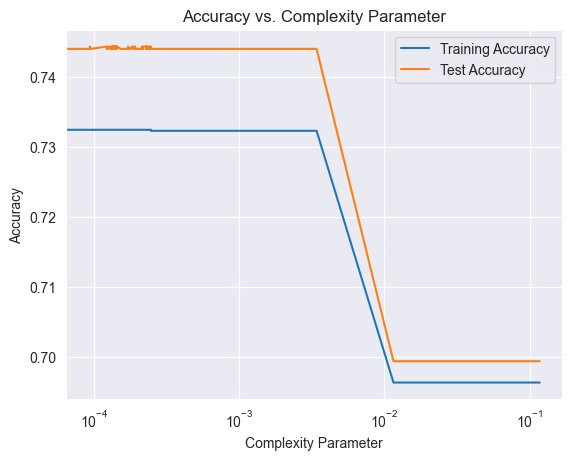

In [17]:
# Addestra l'albero decisionale con diversi valori di complessità
train_accuracy = []
test_accuracy = []

for complexity in ccp_alphas:
    clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=complexity)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Plotta l'accuratezza del modello in funzione del parametro di complessità
plt.plot(ccp_alphas, train_accuracy, label='Training Accuracy')
plt.plot(ccp_alphas, test_accuracy, label='Test Accuracy')
plt.xlabel('Complexity Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Complexity Parameter')
plt.xscale('log')
plt.legend()
plt.show()

Il grafico evidenzia che è possibile ridurre la complessità dell'albero a $10^-4$

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
   clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
   clf.fit(X_train, y_train)
   clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11735577440370942


Utilizziamo i dati sopra raccolti per visualizzare due grafici che mostrano la relazione tra il parametro di complessità (alpha) e due misure della complessità dell'albero decisionale: il numero di nodi e la profondità dell'albero.

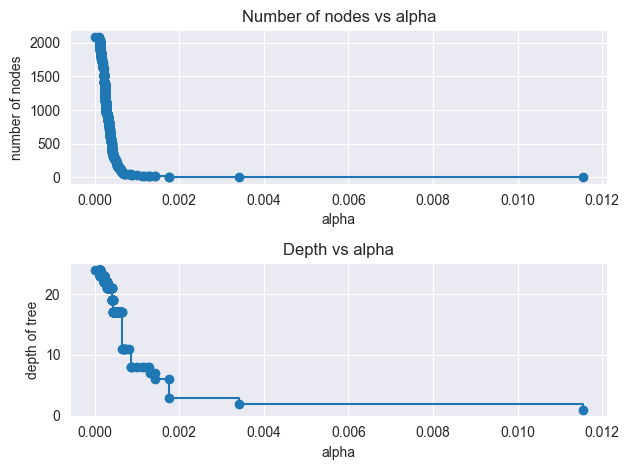

In [19]:
clfs = clfs[:-1]
complexity_values = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(complexity_values, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(complexity_values, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Considerando i due grafici riguardanti il numero di nodi e la profondità dell'albero in relazione al parametro di complessità, insieme al grafico precedente che mostrava l'accuratezza rispetto al parametro di complessità, si osserva che impostando alpha a 0.001 si ottiene un albero potato con un'accuratezza soddisfacente e una profondità, così come un numero di nodi, che lo rendono facilmente interpretabile.

In [ ]:
# Creiamo l'albero potato addestrando un albero con il parametro di complessità e la profondità selezionati
clf_pruned = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.001)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3)

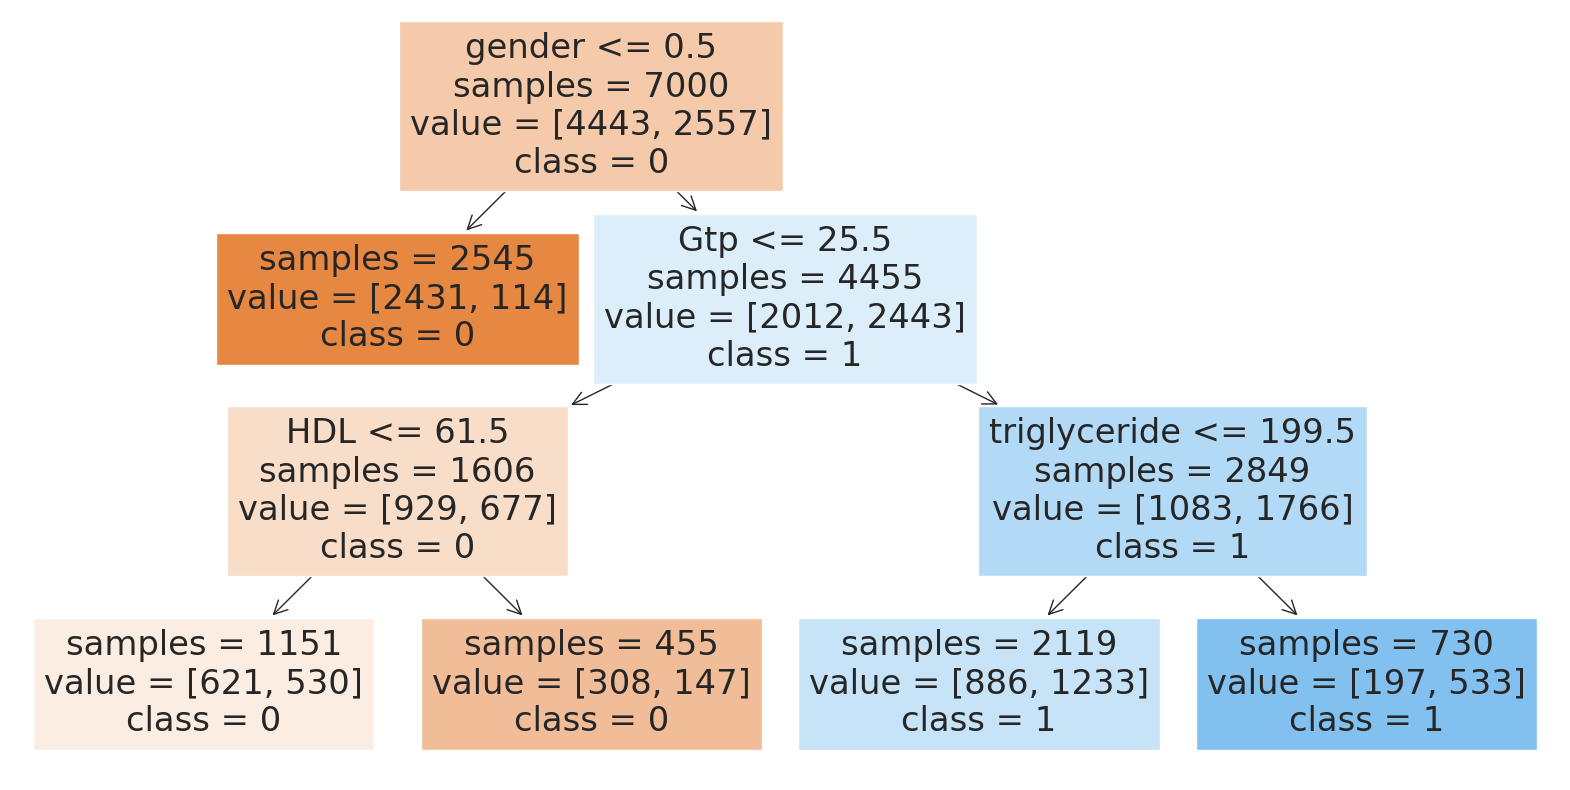

Test Set Performance:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1941
           1       0.62      0.70      0.66      1059

    accuracy                           0.74      3000
   macro avg       0.72      0.73      0.73      3000
weighted avg       0.75      0.74      0.75      3000



In [ ]:
from sklearn.tree import plot_tree

# Mostriamo l'albero ottenuto
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf_pruned,
          feature_names=X_train.columns,
          class_names=[str(x) for x in clf_pruned.classes_],
          filled=True,
          ax=ax,
          impurity=False)

plt.show()

# Calcoliamo e stampiamo le metriche di perfomance di questo albero
y_pred = clf_pruned.predict(X_test)

cm_tree = confusion_matrix(y_test, y_pred)
accuracy_pruned = clf_pruned.score(X_test, y_test)

print("Test Set Performance:")
print(classification_report(y_test, y_pred))

<Axes: >

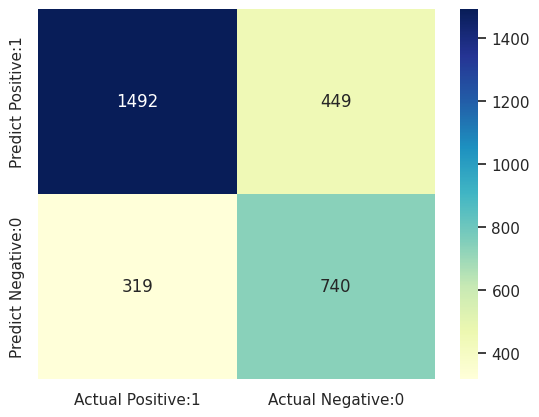

In [ ]:
import seaborn as sns

# Stampiamo heatmap che rappresenta matrice di confusione dell'albero
cm_matrix = pd.DataFrame(data=cm_tree, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Dopo aver effettuato la potatura, notiamo miglioramenti nelle metriche di valutazione dell'albero decisionale, come precisione, richiamo e F1-score, evidenziati grazie alla matrice di confusione e alle metriche di performance.

#### Albero di decisione con PCA

Esploriamo l'addestramento di un albero decisionale utilizzando la PCA al fine di migliorare il modello.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree_pca = DecisionTreeClassifier(random_state=42)
start_time = time()
tree_pca.fit(X_train_pca, y_train_pca)
end_time = time()
DecisionTreePCA_training_time = end_time - start_time

# Visualizza l'albero decisionale
fig, ax = plt.subplots(figsize=(150, 100))
plot_tree(tree_pca, filled=True, ax=ax)
plt.plot()

Output hidden; open in https://colab.research.google.com to view.

Anche in questo caso, il primo addestramento ha generato un albero decisionale eccessivamente grande e poco leggibile. Pertanto, procederemo ad esaminare il parametro di complessità come fatto precedentemente.

In [ ]:
y_pred = tree_pca.predict(X_test_pca)

cm = confusion_matrix(y_test_pca, y_pred)
print("Confusion matrix:\n", cm)

print("Test Set Performance:")
print(classification_report(y_test_pca, y_pred))

Confusion matrix:
 [[1438  503]
 [ 477  582]]
Test Set Performance:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1941
           1       0.54      0.55      0.54      1059

    accuracy                           0.67      3000
   macro avg       0.64      0.65      0.64      3000
weighted avg       0.68      0.67      0.67      3000



In [ ]:
# Calcola i valori del parametro di complessità dell'albero di decisione
path = tree_pca.cost_complexity_pruning_path(X_train_pca, y_train_pca)

# Valori memorizzati
ccp_alphas = path.ccp_alphas

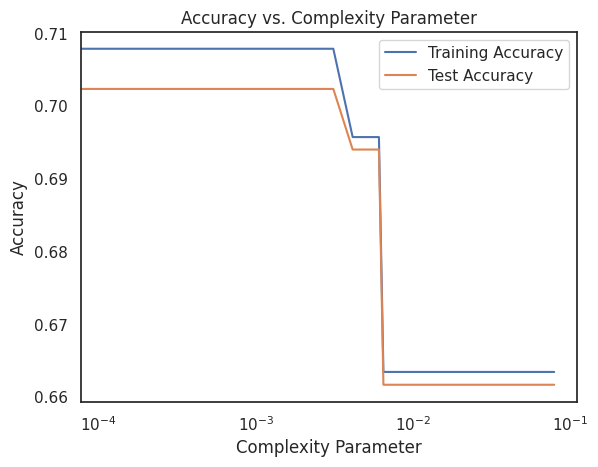

In [ ]:
ccp_alphas = path.ccp_alphas

# Addestra l'albero decisionale con diversi valori di complessità
train_accuracy = []
test_accuracy = []
for complexity in ccp_alphas:
    tree_pca = DecisionTreeClassifier(max_depth=3, ccp_alpha=complexity)
    tree_pca.fit(X_train_pca, y_train_pca)
    train_accuracy.append(tree_pca.score(X_train_pca, y_train_pca))
    test_accuracy.append(tree_pca.score(X_test_pca, y_test_pca))

# Plotta l'accuratezza del modello in funzione del parametro di complessità
plt.plot(ccp_alphas, train_accuracy, label='Training Accuracy')
plt.plot(ccp_alphas, test_accuracy, label='Test Accuracy')
plt.xlabel('Complexity Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Complexity Parameter')
plt.xscale('log')
plt.legend()
plt.show()

Il grafico evidenzia che è possibile ridurre la complessità dell'albero a $10^-4$

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    tree_pca = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree_pca.fit(X_train_pca, y_train_pca)
    clfs.append(tree_pca)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07930505944493016


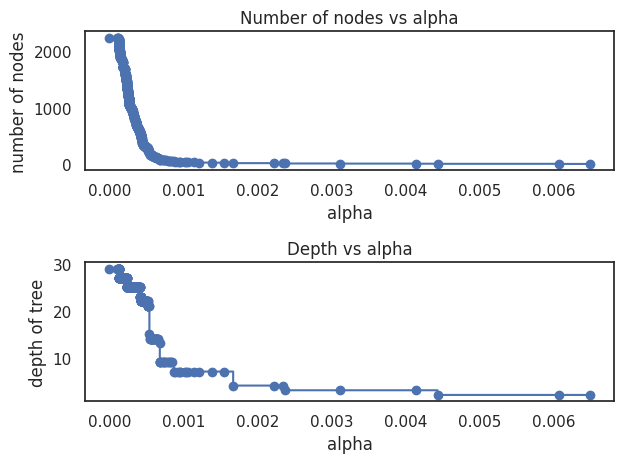

In [ ]:
clfs = clfs[:-1]
complexity_values = ccp_alphas[:-1]

# Creiamo due grafici che mettono in relazione numero di nodi e profondità dell'albero rispetto ad alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(complexity_values, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(complexity_values, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# Creiamo l'albero potato addestrando un albero con il parametro di complessità e la profondità selezionati
tree_pca = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.001)
tree_pca.fit(X_train_pca, y_train_pca)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3)

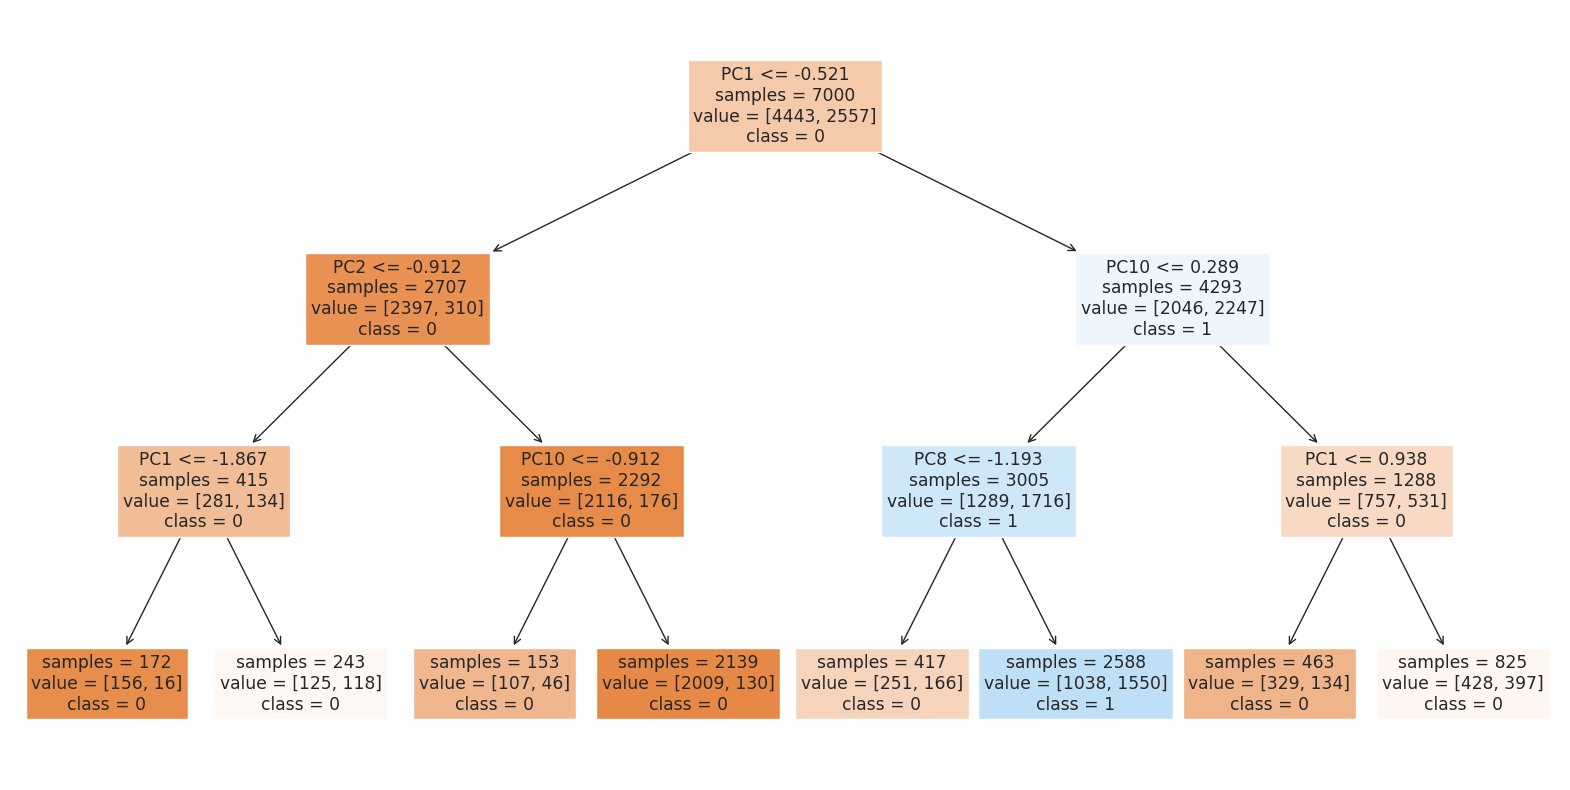

Test Set Performance:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1941
           1       0.58      0.60      0.59      1059

    accuracy                           0.70      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.70      0.70      0.70      3000



In [ ]:
from sklearn.tree import plot_tree

# Mostriamo l'albero ottenuto
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(tree_pca,
          feature_names=X_train_pca.columns,
          class_names=[str(x) for x in tree_pca.classes_],
          filled=True,
          ax=ax,
          impurity=False)

plt.show()

# Calcoliamo la perfomance
y_pred = tree_pca.predict(X_test_pca)

cm_tree_pca = confusion_matrix(y_test_pca, y_pred)

print("Test Set Performance:")
print(classification_report(y_test_pca, y_pred))

Paragonando le metriche di valutazione ottenute utilizzando l'albero addestrato con PCA con quelle ottenute dopo la potatura dell'albero addestrato sul dataset normale, osserviamo un possibile peggioramento delle performance con l'utilizzo della PCA. Tuttavia, per una valutazione più approfondita, confrontiamo le curve ROC e i valori AUC dei due alberi per ottenere una misura più precisa della loro capacità predittiva.

<Axes: >

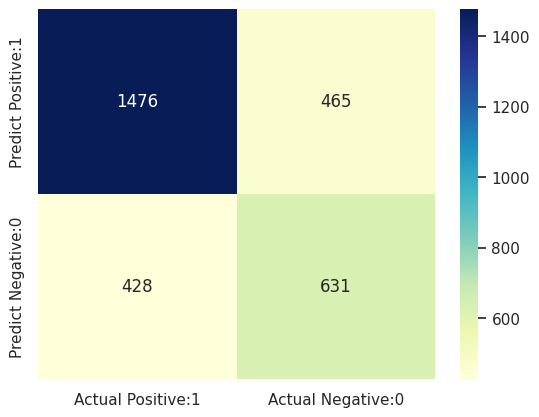

In [ ]:
import seaborn as sns

# Mostriamo matrice di confusione sottoforma di heatmap
cm_matrix = pd.DataFrame(data=cm_tree_pca, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Anche in questo caso, dopo aver effettuato la potatura, notiamo miglioramenti nelle metriche di valutazione dell'albero decisionale, come precisione, richiamo e F1-score, evidenziati grazie alla matrice di confusione e alle metriche di performance.

#### Confronto tra i due alberi con curva ROC

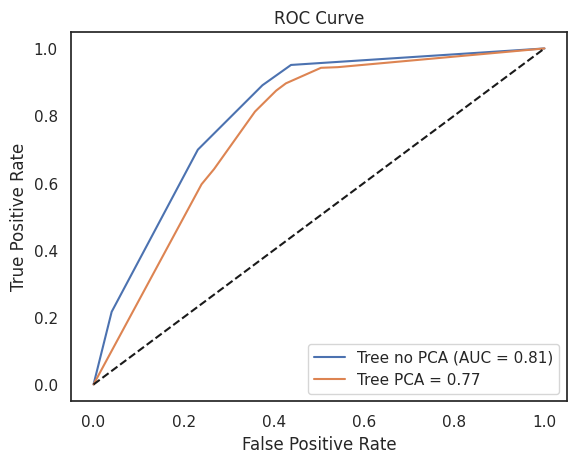

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcola le probabilità predette di appartenenza alla classe positiva per il modello senza PCA
y_pred_prob_tree = clf_pruned.predict_proba(X_test)[:, 1]
# Calcola le probabilità predette di appartenenza alla classe positiva per il modello con PCA
y_pred_prob_tree_pca = tree_pca.predict_proba(X_test_pca)[:,-1]

# Calcola il tasso di falsi positivi (FPR), il tasso di veri positivi (TPR) e le soglie per il modello senza PCA
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_tree)
# Calcola l'AUC per il modello senza PCA
auc_tree = roc_auc_score(y_test, y_pred_prob_tree)

# Calcola il FPR, il TPR e le soglie per il modello con PCA
fpr_tree_pca, tpr_tree_pca, thresholds_tree_pca = roc_curve(y_test_pca, y_pred_prob_tree_pca)
# Calcola l'AUC per il modello con PCA
auc_tree_pca = roc_auc_score(y_test_pca, y_pred_prob_tree_pca)

# Plotta la curva ROC dei due modelli per comparare le performance
plt.plot(fpr_tree, tpr_tree, label=f'Tree no PCA (AUC = {auc_tree:.2f})')
plt.plot(fpr_tree_pca, tpr_tree_pca, label=f'Tree PCA (AUC = {auc_tree_pca:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Confrontando le curve ROC e i valori di AUC (Area Under the Curve) notiamo che il modello che è stato addestrato sul dataset senza PCA offre prestazioni leggermente migliori
Scrivere oss sui tempi di training

In [ ]:
print(f'Tempo di training DecisionTree no PCA: {DecisionTreeNoPCA_training_time:.3f} secondi')
print(f'Tempo di training DecisionTree con PCA: {DecisionTreePCA_training_time:.3f} secondi')

###SVM

Procediamo con l'addestramento del modello tramite SVM, che è particolarmente adatto per dataset di grandi dimensioni e problemi binari. Come abbiamo fatto per gli alberi decisionali, addestreremo prima un modello senza PCA e successivamente uno con.

#### SVM senza PCA

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scegliamo un kernel lineare e un parametro di trade-off di C=10
svm_model = svm.SVC(kernel='linear', random_state=42, C=10, probability=True)

start_time = time()
svm_model.fit(X_train, y_train)
end_time = time()
SVMNoPCA_training_time = end_time - start_time

# Effettua inferenza sul test set
y_pred = svm_model.predict(X_test)

In [ ]:
# predizione del nuovo modello
y_pred = svm_model.predict(X_test)

# Calcolo matrice di confusione e classification report
cm_svm = confusion_matrix(y_test, y_pred)

print("Test Set Performance:")
print(classification_report(y_test, y_pred))

Test Set Performance:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1302
           1       0.64      0.70      0.67       698

    accuracy                           0.76      2000
   macro avg       0.73      0.74      0.74      2000
weighted avg       0.76      0.76      0.76      2000



<Axes: >

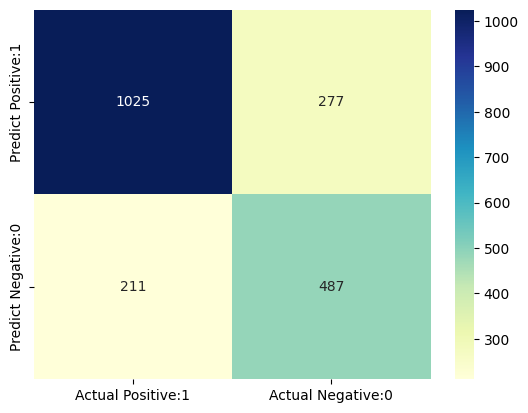

In [ ]:
import seaborn as sns

# Visualizziamo matrice di confusione come heatmap
cm_matrix = pd.DataFrame(data=cm_svm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Mostriamo il numero di vettori di supporto
print (f"Number of support vectors: {svm_model.support_vectors_.shape[0]}")

Number of support vectors: 3625


In [ ]:
#Per vedere overfitting
y_pred = svm_model.predict(X_train)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(y_train, y_pred)

# Valutiamo le prestazione del modello sia su training set che su test set per valutare che non sia soggetto a overfitting
print('Training set score: {:.4f}'.format(svm_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm_model.score(X_test, y_test)))

Training set score: 0.7481
Test set score: 0.7560


Il modello non è soggetto a overfitting

#### SVM con PCA

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Come per modello addestrato su dataset normale, scegliamo un kernel lineare e un parametro di trade-off di C=10
svm_pca = svm.SVC(kernel='linear', random_state=42, C=10, probability=True)

start_time = time()
svm_pca.fit(X_train_pca, y_train_pca)
end_time = time()
SVMPCA_training_time = end_time - start_time

# Effettua le predizioni sul test set
y_pred = svm_pca.predict(X_test_pca) # predizione su dati non ancora visti (inferenza)

In [ ]:
# predizione del nuovo modello
y_pred = svm_pca.predict(X_test_pca)

cm_svm_pca = confusion_matrix(y_test_pca, y_pred)

print("Test Set Performance:")
print(classification_report(y_test_pca, y_pred))

Test Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1302
           1       0.61      0.66      0.64       698

    accuracy                           0.74      2000
   macro avg       0.71      0.72      0.72      2000
weighted avg       0.74      0.74      0.74      2000



Paragonando le metriche di valutazione ottenute utilizzando la SVM con PCA con quelle ottenute dal modello addestrato sul dataset normale, notiamo un leggero deterioramento delle performance quando si utilizza la PCA. Tuttavia, per un'analisi più approfondita, confrontiamo le curve ROC e i valori AUC dei due modelli, come già fatto per gli alberi, al fine di ottenere una misura più precisa della loro capacità predittiva.

<Axes: >

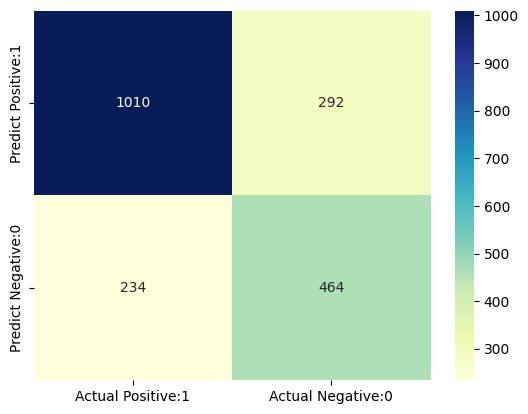

In [ ]:
import seaborn as sns
# Mostriamo matrice di confusione
cm_matrix = pd.DataFrame(data=cm_svm_pca, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Stampiamo il numero di vettori di supporto
print (f"Number of support vectors: {svm_pca.support_vectors_.shape[0]}")

Number of support vectors: 4895


Notiamo che sono di più rispetto al modello addestrato senza PCA. Proviamo a studiare prestazioni su test set e training set per evitare che sia soggetto a overfitting

In [ ]:
y_pred = svm_pca.predict(X_train_pca)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(y_train_pca, y_pred)

print('Training set score: {:.4f}'.format(svm_pca.score(X_train_pca, y_train_pca)))

print('Test set score: {:.4f}'.format(svm_pca.score(X_test_pca, y_test_pca)))

Training set score: 0.7255
Test set score: 0.7370


Notiamo che anche questo non è soggetto a overfitting

#### Confronto tra i due modelli SVM con curva ROC

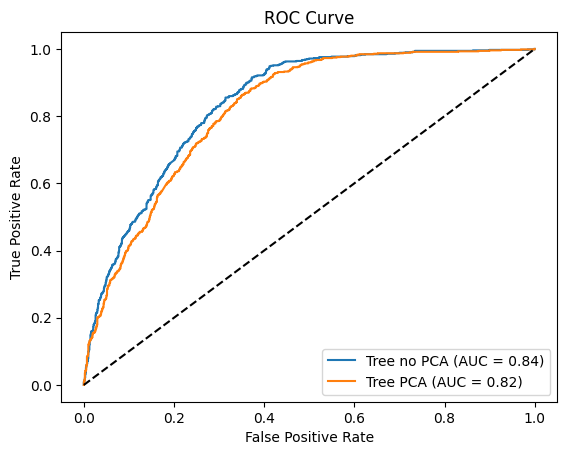

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcola le probabilità predette di appartenenza alla classe positiva per il modello senza PCA
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]
# Calcola le probabilità predette di appartenenza alla classe positiva per il modello con PCA
y_pred_prob_svm_pca = svm_pca.predict_proba(X_test_pca)[:,-1]

# Calcola il tasso di falsi positivi (FPR), il tasso di veri positivi (TPR) e le soglie per il modello senza PCA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
# Calcola l'AUC per il modello senza PCA
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

# Calcola il FPR, il TPR e le soglie per il modello con PCA
fpr_svm_pca, tpr_svm_pca, thresholds_svm_pca = roc_curve(y_test_pca, y_pred_prob_svm_pca)
# Calcola l'AUC per il modello con PCA
auc_svm_pca = roc_auc_score(y_test_pca, y_pred_prob_svm_pca)

# Plotta la curva ROC dei due modelli per comparare le performance
plt.plot(fpr_svm, tpr_svm, label=f'SVM no PCA (AUC = {auc_svm:.2f})')
plt.plot(fpr_svm_pca, tpr_svm_pca, label=f'SVM PCA (AUC = {auc_svm_pca:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Confrontando le curve ROC dei due modelli addestrati con SVM, osserviamo che, come accade anche con gli alberi decisionali, l'applicazione di PCA porta a un leggero peggioramento delle performance.

###Confronto tempi di Addestramento

In [ ]:
print(f'Tempo di training SVM no PCA: {SVMNoPCA_training_time:.3f} secondi')
print(f'Tempo di training SVM con PCA: {SVMPCA_training_time:.3f} secondi')

Tuttavia, il modello addestrato senza PCA impiega molto più tempo per l'addestramento

##Stratified Cross Validation

###Decision tree No PCA

In [16]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import scipy.stats as st
import numpy as np

In [17]:
n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

In [18]:
y_tree=df['smoking']
df = df.drop('smoking', axis=1)

In [19]:
accuracy_stratified_tree = []

start_time = time()
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df, y_tree)):
        X_train_tree, X_valid_tree = df.iloc[train_idx], df.iloc[valid_idx]
        y_train_tree, y_valid_tree = y_tree[train_idx], y_tree[valid_idx]

        tree = DecisionTreeClassifier(max_depth=3, random_state=42)
        tree.fit(X_train_tree, y_train_tree)

        y_pred_valid_tree = tree.predict(X_valid_tree)
        accuracy_stratified_tree.append(accuracy_score(y_valid_tree,y_pred_valid_tree))
end_time = time()
cv_time_decisiontree = end_time - start_time

In [20]:
accuracy_stratified_tree

[0.717, 0.734, 0.737, 0.714, 0.73, 0.732, 0.735, 0.73, 0.751, 0.756]

In [21]:
st.t.interval(confidence=0.90, df=len(accuracy_stratified_tree)-1, loc=np.mean(accuracy_stratified_tree), scale=st.sem(accuracy_stratified_tree))

(0.7261003996586887, 0.7410996003413114)

###SVM PCA

In [22]:
from sklearn.svm import SVC

In [23]:
n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

In [24]:
y_SVM=df_pca['target']
df_pca = df_pca.drop('target', axis=1)

In [25]:
accuracy_stratified_pca = []

start_time = time()
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df_pca, y_SVM)):
        X_train, X_valid = df_pca.iloc[train_idx], df_pca.iloc[valid_idx]
        y_train, y_valid = y_SVM[train_idx], y_SVM[valid_idx]

        svm = SVC(kernel = 'linear', C=10, random_state=42)
        svm.fit(X_train, y_train)

        y_pred_valid = svm.predict(X_valid)
        accuracy_stratified_pca.append(accuracy_score(y_valid,y_pred_valid))
end_time = time()
cv_time_svm_pca = end_time - start_time

In [26]:
accuracy_stratified_pca

[0.721, 0.732, 0.724, 0.724, 0.733, 0.72, 0.71, 0.726, 0.745, 0.734]

In [28]:
st.t.interval(confidence=0.90, df=len(accuracy_stratified_pca)-1, loc=np.mean(accuracy_stratified_pca), scale=st.sem(accuracy_stratified_pca))

(0.7213435877178489, 0.7324564122821509)

###SVM senza PCA

In [30]:
n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

In [ ]:
accuracy_stratified_NOpca = []

start_time = time()
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df_pca, y_tree)):
        X_train, X_valid = df.iloc[train_idx], df.iloc[valid_idx]
        y_train, y_valid = y_tree[train_idx], y_tree[valid_idx]

        svm = SVC(kernel = 'linear', C=10, random_state=42)
        svm.fit(X_train, y_train)

        y_pred_valid = svm.predict(X_valid)
        accuracy_stratified_NOpca.append(accuracy_score(y_valid,y_pred_valid))

end_time = time()
cv_time_svm = end_time - start_time

In [ ]:
accuracy_stratified_NOpca

In [ ]:
st.t.interval(confidence=0.90, df=len(accuracy_stratified_NOpca)-1, loc=np.mean(accuracy_stratified_NOpca), scale=st.sem(accuracy_stratified_NOpca))

##Confronti

####Confronto confusion matrix

In [ ]:
# predizione del nuovo modello
y_pred_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)

y_pred_svm_pca = svm.predict(X_test_pca)
cm_svm_pca = confusion_matrix(y_test_pca, y_pred_svm_pca)

In [ ]:
import seaborn as sns

cm_matrix_tree = pd.DataFrame(data=cm_tree, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_tree, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Matrice di confusione albero")
plt.show()

cm_matrix_svm_pca = pd.DataFrame(data=cm_svm_pca, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_svm_pca, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Matrice di confusione svm con pca")
plt.show()

####Confronto intervalli di confidenza

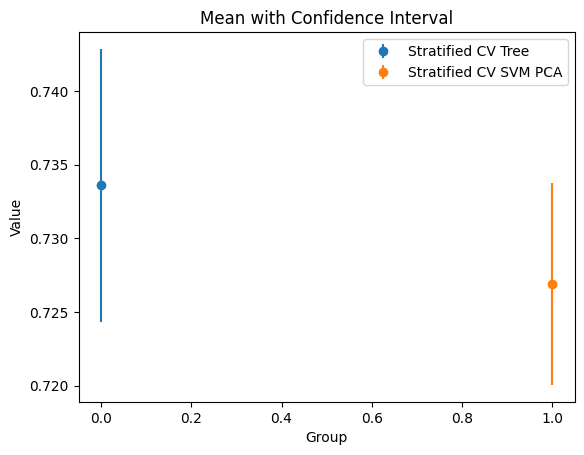

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate mean and confidence interval on repeated accuracy_stratified_tree
mean_value = np.mean(accuracy_stratified_tree)
confidence_interval = stats.t.interval(0.95, len(accuracy_stratified_tree)-1, loc=np.mean(accuracy_stratified_tree), scale=stats.sem(accuracy_stratified_tree))

# Plot the mean and confidence interval
plt.errorbar(0, mean_value, yerr=(confidence_interval[1] - confidence_interval[0])/2, fmt='o', label='Stratified CV Tree')

# Calculate mean and confidence interval on accuracy_stratified_pca
mean_value = np.mean(accuracy_stratified_pca)
confidence_interval = stats.t.interval(0.95, len(accuracy_stratified_pca)-1, loc=np.mean(accuracy_stratified_pca), scale=stats.sem(accuracy_stratified_pca))

# Plot the mean and confidence interval
plt.errorbar(1, mean_value, yerr=(confidence_interval[1] - confidence_interval[0])/2, fmt='o', label='Stratified CV SVM PCA')


# Add labels and title
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean with Confidence Interval')

# Show the plot
plt.legend()
plt.show()


In [ ]:
print(f'Tempo di cross validation DecisionTree no PCA: {cv_time_decisiontree:.3f} secondi')

print(f'Tempo di cross validation SVM no PCA: {cv_time_svm:.3f} secondi')
print(f'Tempo di cross validation SVM con PCA: {cv_time_svm_pca:.3f} secondi')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcola le probabilità predette per la classe positiva
y_pred_prob_tree = tree.predict_proba(X_test)[:, 1]
y_pred_prob_svm_pca = svm_pca.predict_proba(X_test_pca)[:,-1]

# utilizzando clf_pruned.predict(X_test), si ottengono solo le predizioni di classe effettive, che non forniscono le informazioni necessarie per costruire la curva ROC e calcolare l'AUC.

# Calcola la curva ROC e l'AUC della SVM senza PCA
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_tree)
auc_tree = roc_auc_score(y_test, y_pred_prob_tree)

# Calcola la curva ROC e l'AUC della SVM con PCA
fpr_svm_pca, tpr_svm_pca, thresholds_svm_pca = roc_curve(y_test_pca, y_pred_prob_svm_pca)
auc_svm_pca = roc_auc_score(y_test_pca, y_pred_prob_svm_pca)

# Plotta la curva ROC dei due modelli per comparare le performance
plt.plot(fpr_tree, tpr_tree, label=f'Tree no PCA (AUC = {auc_tree:.2f})')
plt.plot(fpr_svm_pca, tpr_svm_pca, label=f'svm PCA (AUC = {auc_svm_pca:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()